<a href="https://colab.research.google.com/github/baemsu/face/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80AI%EC%84%9C%EB%B9%84%EC%8A%A4%EA%B0%9C%EB%B0%9C_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **개요**
---
# [서비스명] 얼굴관상 AI 서비스
## [부제] 나의 얼굴은 정치인? 연예인? 운동선수? 기업가? 교수?
---

##**[미니 PJT 목표]**

---
1.   이미지기반으로 인공지능 서비스를 A~Z까지 실행해 볼수 있다.
2.   셀레니움을 이용하여 구글 검색 결과에 따른 이미지들을 크롤링할수 있다.
3.   CNN를 통해 이미지 분류 학습을 할수 있다.(또는 티처블 머신을 통해 모델만 활용할수 있다.)
4.   Streamlit을 통해 Front end를 설계할수 있다.
5.   github와 cloud를 통해 모바일에서 접근가능한 웹/앱으로 개발할수 있다.
---







## **[얼굴 관상 AI서비스] 세부디자인** 
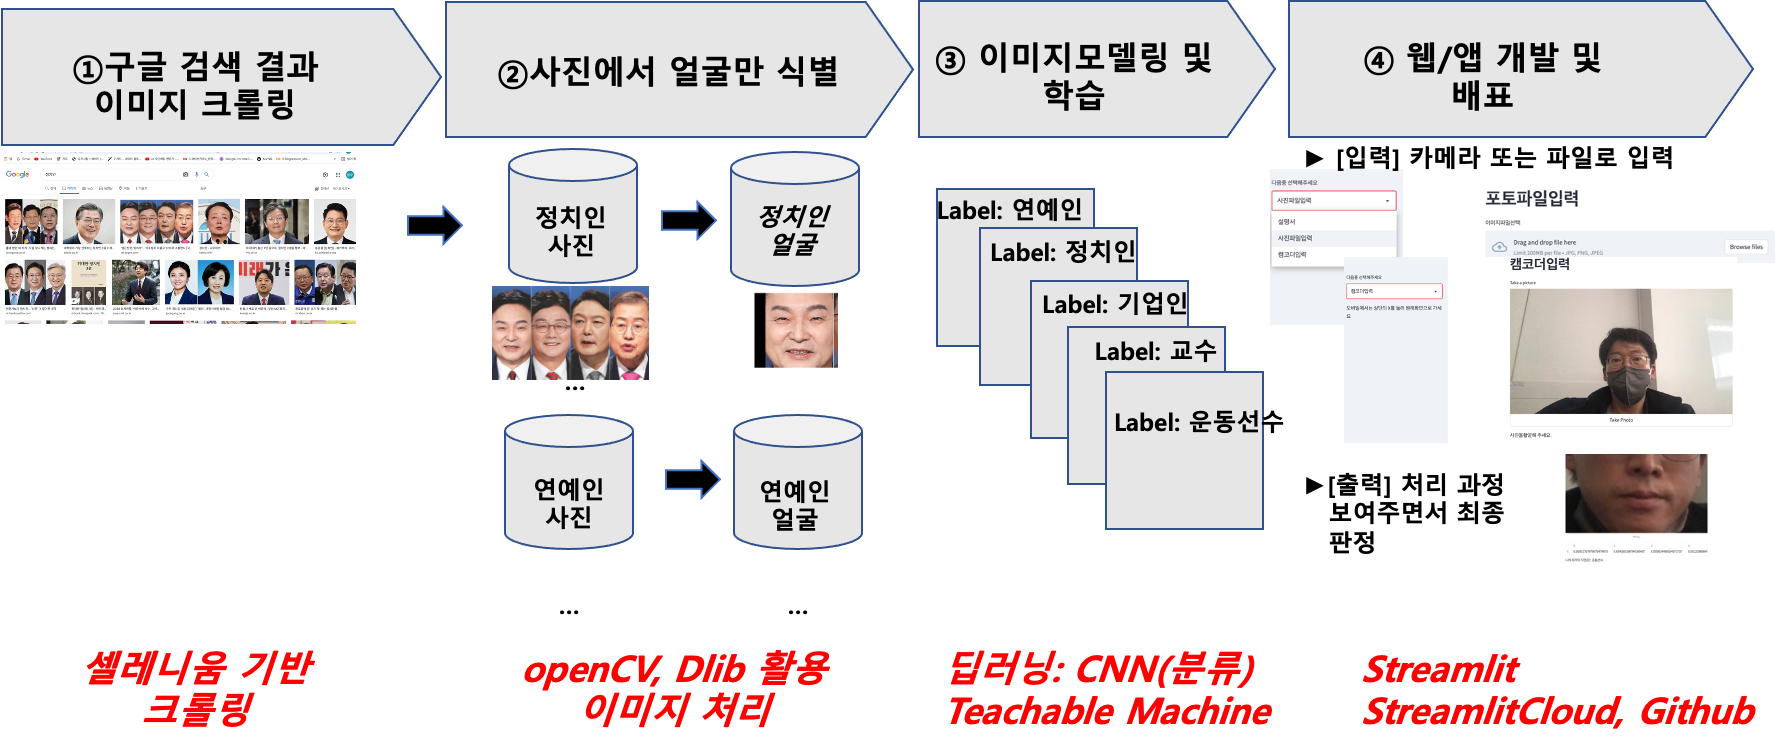


# **[PJT 미션 순서]**

---


1.   셀레니움을 활용 연예인 사진, 정치인 사진, 기업인 사진을 크롤링한후 구글 드라이브 또는 로컬에 저장하세요 (폴더명은 연예인, 정치인, 기업인 입니다.)
2.   OpenCV의 dlib라이브러리를 이용하여 크롤링한 이미지들에서 얼굴만 가지고 와서 폴더에 저장하세요.(폴더명은 연예인얼굴, 정치인얼굴, 기업인얼굴로 만들어주세요)
3.   티쳐블머신 또는 CNN를 통해 이미지 분류 모델을 만들어주세요. (GPU가 없기 때문에 코랩이나 티쳐블 머신을 사용해도 상관 없습니다.) 분류 모델을 만든 후 model.h로 저장해 주세요.
4.   신규 이미지를 넣어 보면서 어떤 결과가 나오는지 확인하세요. (입력부터 출력 파이프라인을 작성하세요.)
5.   Streamlit를 활용해 간단한 입력 출력 UI를 만들어 주세요.
6.   코랩을 통해 입력부터 출력까지 테스트 해봐 주세요.
7.   모델이 포함된 전체 app.py 파일을 생성해 주세요.
8.   스트림잇이 정상 작동되는지 확인 하세요.
9.   깃허브에 해당 코드, 모델, 환경을 올려주세요.
10.  Streamlit cloud에 가입하고, github의 해당 프로젝트를 연결하여 배포하세요.
11.  제공된 URL로 모바일 및 PC로 확인하세요.

---







# **1. 구글 검색결과 이미지 크롤링하기** 
* 코랩에서 셀레니움 환경 세팅하기
* 셀레니움을 통해 크롤링하기
* 저장된 이미지 확인하기
* **[미션] 제공되는 코드를 활용해 연예인, 기업인 이미지를 크롤링해보세요.**


## (1) 코랩에서 셀레니움을 위한 파일 인스톨하기

In [ ]:
!pip3 install selenium
#코랩에서 구글드라이버 연동
!apt-get update
!apt install chromium-chromedriver

from google.colab import drive
drive.mount('/content/drive')

## (2) 패키지 임포트 하기

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from urllib.request import urlopen
import urllib
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import sys
from selenium.webdriver.common.by import By

##(3) 코랩을 위한 셀레니움 환경 설정하기

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

## (4) 이미지 검색창 선택
* 해당  URL를 확인 (이미지검색을 클릭하여 가지고 오기)
* 가지고 오는 시간 지체 설정
* 개발자 모드를 확인하여 어느 곳에 이름을 입력할지 확인

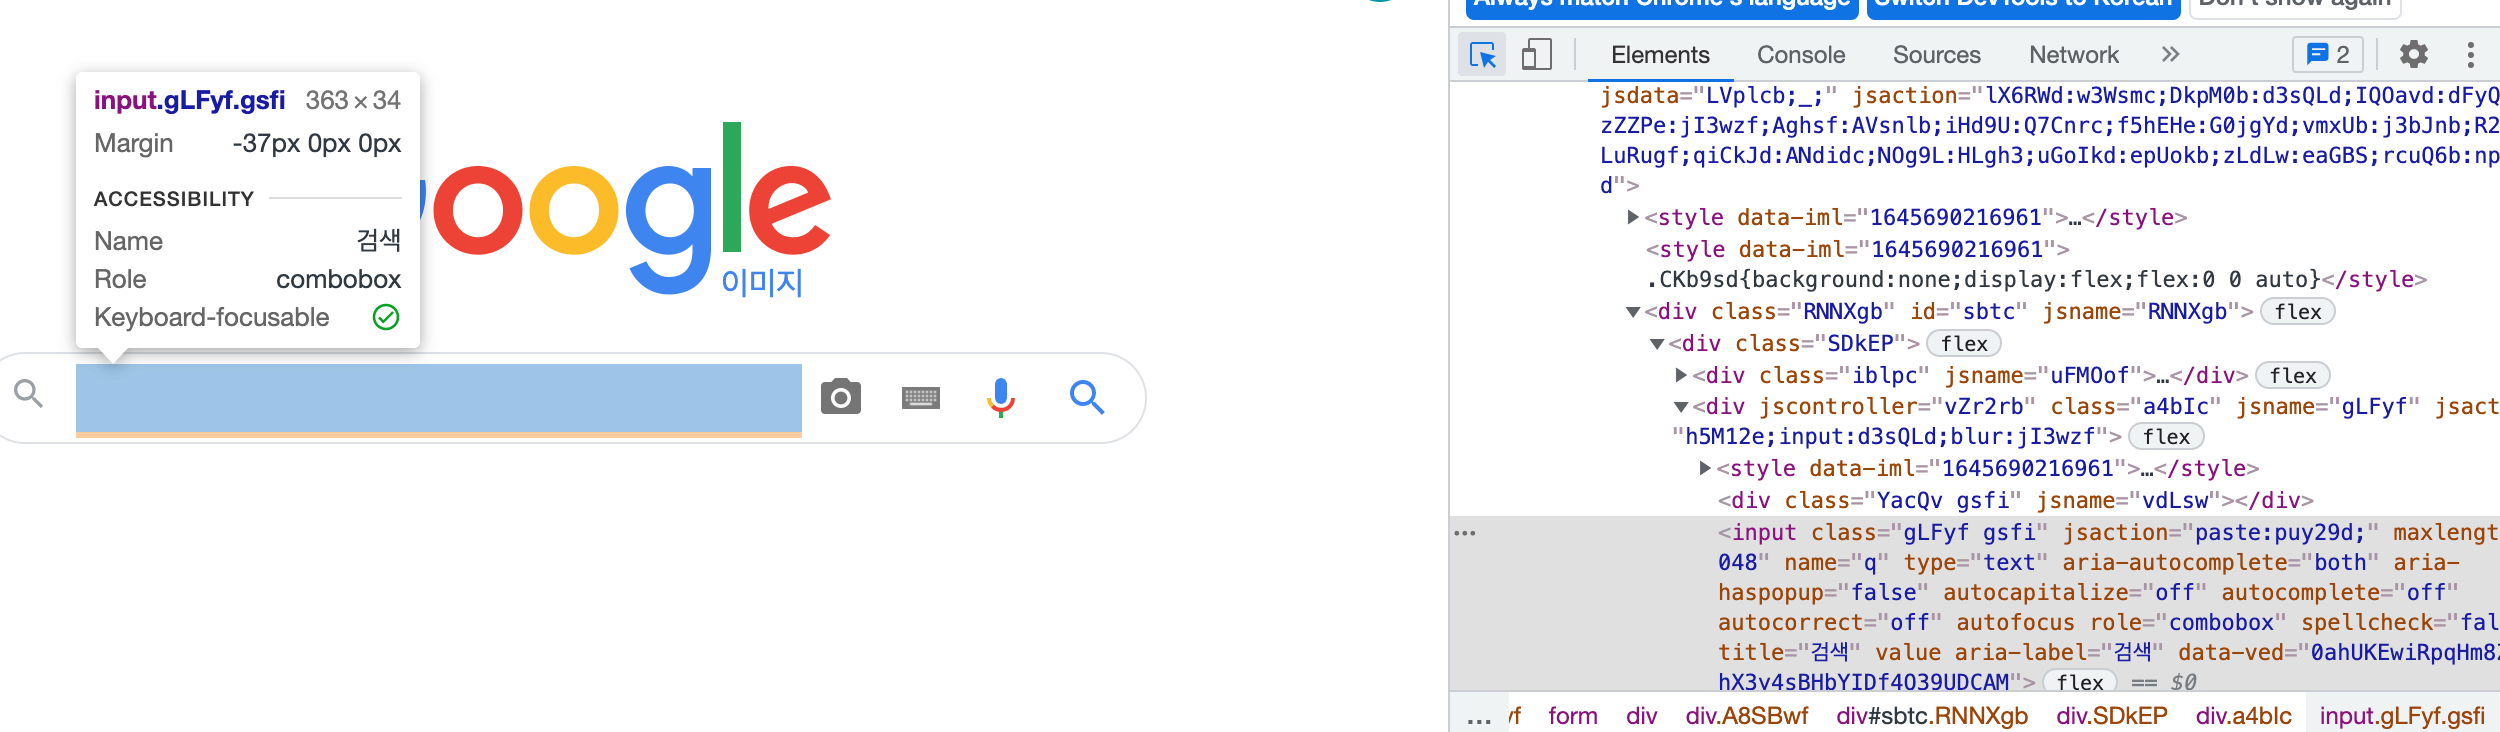

In [ ]:
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl")
time.sleep(1)
#Name으로 요소 선택
elem = driver.find_element(By.NAME, "q")
time.sleep(1)

## (5)검색어 입력한 후 엔터 키 치기 

In [ ]:
name = "정치인"
elem.send_keys(name)
time.sleep(1)
elem.send_keys(Keys.RETURN)
time.sleep(1)

##(6) 끝까지 스크롤링해서 전체 이미지 데이터를 웹에 뿌리기

In [ ]:
SCROLL_PAUSE_TIME = 1
    # Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")  # 브라우저의 높이를 자바스크립트로 찾음
while True:
        # Scroll down to bottom
  driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
        # Wait to load page
  time.sleep(SCROLL_PAUSE_TIME)
        # Calculate new scroll height and compare with last scroll height
  new_height = driver.execute_script("return document.body.scrollHeight")
  if new_height == last_height:
    try:
      driver.find_element(By.CSS_SELECTOR, ".mye4qd").click()
    except:
      break
  last_height = new_height

## (7) 작은 이미지들이 들어가 있는엘리먼드들을 모두 저장하기
* 클릭할 대상자들을 기억한다.

In [ ]:
#작은 이미지들이 들어가 있는 엘리먼트들을 저장해두기
time.sleep(5)
imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")
time.sleep(5)
print(imgs)

[<selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="2d19d09f-9d47-46c9-b0cf-f37fcb0b2abb")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="a3b38234-7288-455b-b13b-9ac33285f607")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="95cf5255-46c9-4f35-80ea-c51097ab5f0c")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="6f05e219-e22f-439e-84d9-edf4e2b1134c")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="b8a160fd-a190-450f-836c-31d2e471ff84")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="b0cb2009-ce90-41f2-9d7c-d34ac816ba63")>, <selenium.webdriver.remote.webelement.WebElement (session="f817e55eb46b83d6232d627a438d785a", element="6d890e25-a429-497b-ad27-e626b654

## (8) 이미지(섬네일) 하나하나를 클릭한 후, 해당 패스의 src url로 이동한다.
* 이동 후 img들을 다운로드 한다. 

In [ ]:
# 폴더가 있어야 함
path = "/content/drive/MyDrive/Colab Notebooks/정치인/"

count = 1
for img in imgs:
  try:
    img.click()
    time.sleep(3)
    print(count)

    # 크게 뜬 이미지의 copy Xpath를 통해 패스를 가지고오고, 그 밑에 src를 가지고온다.
    imgUrl = driver.find_element(By.XPATH,'//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div/a/img').get_attribute("src") # 크게 뜬 이미지 선택하여 "src" 속성을 받아옴

    #해당 사이트에서 src가 그림파일이므로 이를 다운로드 받는다. (urllib.request.urlretrieve)
    urllib.request.urlretrieve(imgUrl, path + name + str(count) + ".jpg")
    print(path + name + str(count) + ".jpg")


    count = count + 1
    if count > 500: #다운 받을 이미지 갯수 조정
      break
  except:
    pass

1
/content/drive/MyDrive/Colab Notebooks/정치인정치인1.jpg
2
/content/drive/MyDrive/Colab Notebooks/정치인정치인2.jpg
3
/content/drive/MyDrive/Colab Notebooks/정치인정치인3.jpg
4
/content/drive/MyDrive/Colab Notebooks/정치인정치인4.jpg
5
/content/drive/MyDrive/Colab Notebooks/정치인정치인5.jpg
6
/content/drive/MyDrive/Colab Notebooks/정치인정치인6.jpg
7
/content/drive/MyDrive/Colab Notebooks/정치인정치인7.jpg
8
/content/drive/MyDrive/Colab Notebooks/정치인정치인8.jpg
9
/content/drive/MyDrive/Colab Notebooks/정치인정치인9.jpg
10
/content/drive/MyDrive/Colab Notebooks/정치인정치인10.jpg
11
/content/drive/MyDrive/Colab Notebooks/정치인정치인11.jpg
12
/content/drive/MyDrive/Colab Notebooks/정치인정치인12.jpg
13
/content/drive/MyDrive/Colab Notebooks/정치인정치인13.jpg
14
/content/drive/MyDrive/Colab Notebooks/정치인정치인14.jpg
15
/content/drive/MyDrive/Colab Notebooks/정치인정치인15.jpg
16
/content/drive/MyDrive/Colab Notebooks/정치인정치인16.jpg
17
/content/drive/MyDrive/Colab Notebooks/정치인정치인17.jp

# **[관련미션1] 1. 구글검색 이미지 크롤링**
* **icrawler를 활용하여 이미지 크롤링을 시도해보세요**
* [참고사항] 구글링해보세요


In [1]:
# icrawler를 활용해 "운동선수 사진들"을 크롤링해 보시기 바랍니다.



# **2. 사진에서 얼굴만 가지고 오기**
* OpenCV를 통해 얼굴들만 가지고 온다
* **[미션] 제공되는 코드를 활용하여 연예인, 기업인의 얼굴만 크롭하세요**

## (1) cv와 dlib 등 임포트하기
* 코랩은 cv2_imshow, 다른 환경은 cv2.imshow
* cv2는 이미지 보이기, 입력처리하는데 활용
* dlib은 얼굴만 자르는 데 활용

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import dlib
from skimage import io
import matplotlib.pyplot as plt
from pathlib import Path

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## (2) 얼굴의 페이스만 가져오는 함수 작성
* 이미지 읽어오기 (io.imread)
* 그레이로 변환하기 (페이스 잡기 위한 전처리, cv2.cvtColor)
* 얼굴 찾기 (dlib.get)
* 얼굴 좌표 찾기
* 원래의 파일명으로 저장하기 (Path( ).stem)
* 폴더에 얼굴 저장하기 (plt를 통해 저장함)
* 원래 이미지폴더안에서 파일들 가지고 오기 (glob)

In [ ]:
def detect_crop_face(image_path):

    #이미지를 읽고 그레이로 변환
    image = io.imread(image_path)
    try:
      gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a face detector
      face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
      detected_faces = face_detector(gray, 1)
      face_frames = [(x.left(), x.top(),
                      x.right(), x.bottom()) for x in detected_faces]


    #파일명만가지고 오기
      file_name = Path(image_path).stem

    # 찾은 얼굴들을 가지고 보여주고 저장하기 
      i=1
      for n, face_rect in enumerate(face_frames):
        face = Image.fromarray(image).crop(face_rect)

      #여러개 그림을 플롯하는 것
 #    plt.subplot(1, len(detected_faces), n+1)
        plt.axis('off')
        plt.imshow(face)
        plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/정치인얼굴/{file_name}_{i}.jpg')
        i = i+1
    except:
      pass

## (3) 원본 이미지폴더에서 파일을 하나씩 호출하면서 함수 적용
* glob활용

/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인1.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인2.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인3.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인4.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인5.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인6.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인7.jpg
/content/drive/MyDrive/Colab Notebooks/정치인/정치인정치인8.jpg


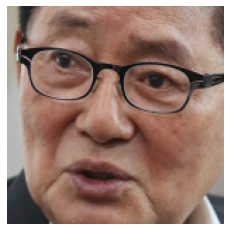

In [ ]:
import glob
images = glob.glob('/content/drive/MyDrive/Colab Notebooks/정치인/*.*')

for fname in images:
  print(fname)
  detect_crop_face(fname)

# **3. Keras CNN를 활용한 이미지분류**
* Keras를 활용하여 모델을 구성하고 모델링을 하기 바랍니다.
* 이미지 지정 및 이미지 동일 크기로 불러오기
* 이미지를 하나의 데이터셋에 저장하기


In [ ]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split

# 분류 대상 카테고리 선택하기 
face_dir = "/content/drive/MyDrive/2022/face"
categories = ["남자CEO얼굴","남자연예인얼굴"]
nb_classes = len(categories)
# 이미지 크기 지정 
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
# 이미지 데이터 읽어 들이기 
X = []
Y = []
for idx, cat in enumerate(categories):
    # 레이블 지정 
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    # 이미지 
    image_dir = face_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i, f in enumerate(files):
        img = Image.open(f) 
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)      # numpy 배열로 변환
        X.append(data)
        Y.append(label)
        if i % 10 == 0:
            print(i, "\n", data)
X = np.array(X)
Y = np.array(Y)
# 학습 전용 데이터와 테스트 전용 데이터 구분 
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)

print('>>> data 저장중 ...')
np.save("/content/drive/MyDrive/2022/face/4obj.npy", xy)
print("ok,", len(Y))

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

# 카테고리 지정하기
categories = ["남자CEO얼굴","남자연예인얼굴"]
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64
# 데이터 열기 
#X_train, X_test, y_train, y_test = np.load("/content/drive/MyDrive/2022/face/4obj.npy")
# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 256
X_test  = X_test.astype("float")  / 256
print('X_train shape:', X_train.shape)

# 모델 구조 정의 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])
# 모델 확인
#print(model.summary())

# 학습 완료된 모델 저장
hdf4_file = "/content/drive/MyDrive/2022/face/4obj-model.hdf5"
if os.path.exists(hdf4_file):
    # 기존에 학습된 모델 불러들이기
    model.load_weights(hdf4_file)
else:
    # 학습한 모델이 없으면 파일로 저장
    model.fit(X_train, y_train, batch_size=32, epochs=10)
    model.save_weights(hdf4_file)

X_train shape: (585, 64, 64, 3)
Epoch 1/10
19/19 [==============================] - 11s 459ms/step - loss: 0.7132 - accuracy: 0.5538
Epoch 2/10
19/19 [==============================] - 8s 443ms/step - loss: 0.6778 - accuracy: 0.6051
Epoch 3/10
19/19 [==============================] - 8s 442ms/step - loss: 0.6794 - accuracy: 0.6051
Epoch 4/10
19/19 [==============================] - 8s 439ms/step - loss: 0.6781 - accuracy: 0.5966
Epoch 5/10
19/19 [==============================] - 8s 439ms/step - loss: 0.6782 - accuracy: 0.5915
Epoch 6/10
19/19 [==============================] - 8s 439ms/step - loss: 0.6907 - accuracy: 0.6051
Epoch 7/10
19/19 [==============================] - 9s 447ms/step - loss: 0.6786 - accuracy: 0.6051
Epoch 8/10
19/19 [==============================] - 9s 485ms/step - loss: 0.6806 - accuracy: 0.6034
Epoch 9/10
19/19 [==============================] - 8s 443ms/step - loss: 0.6866 - accuracy: 0.6051
Epoch 10/10
19/19 [==============================] - 8s 439ms/step 

In [ ]:
# 모델 평가하기 
score = model.evaluate(X_test, y_test)
print('loss=', score[0])        # loss
print('accuracy=', score[1])    # acc

7/7 [==============================] - 2s 165ms/step - loss: 0.6668 - accuracy: 0.6205
loss= 0.6667851209640503
accuracy= 0.620512843132019


# **[관련미션3] 3.구글의 제공하는 API로 학습하여 모델 활용하여 예측해보기**

In [2]:
# 모델을 활용하여 입력으로 사진을 받아 출력하는 코드를 작성하세요




# **4. Streamlit을 통한 frontend 개발**
* streamlit를  코랩에 설치해 주시기 바랍니다.
* 이를 활용해 클라우드에 띄울수 있는 방법을 코딩합니다.
* app.py에 모두 넣고 사진 입력을 코딩해주세요